In [55]:
import pandas as pd
import numpy as np

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [57]:
# We slightly rename the features
new_names = {"fixed acidity": "fixed_acidity", 
             "volatile acidity": "volatile_acidity",
             "citric acid": "citric",
             "residual sugar": "sugar",
             "free sulfur dioxide": "free_SD",
             "total sulfur dioxide": "total_SD"}

# 1. Exploration of Red Wine

In [58]:
red_original = pd.read_csv("data/winequality-red.csv", delimiter=";").rename(columns=new_names)

In [103]:
#red_original.to_csv("data/red_data.csv", index=False)

In [59]:
red_original.shape

(1599, 12)

In [60]:
red_original.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
red_original.isnull().any()

fixed_acidity       False
volatile_acidity    False
citric              False
sugar               False
chlorides           False
free_SD             False
total_SD            False
density             False
pH                  False
sulphates           False
alcohol             False
quality             False
dtype: bool

No missing values!

In [62]:
red_original.describe()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


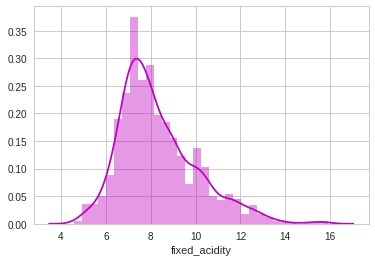

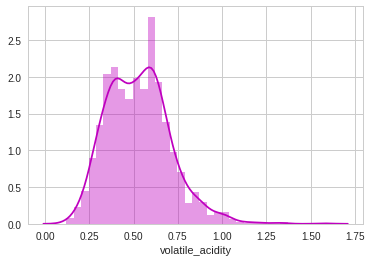

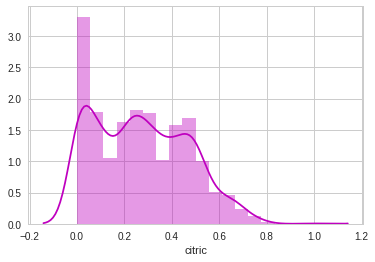

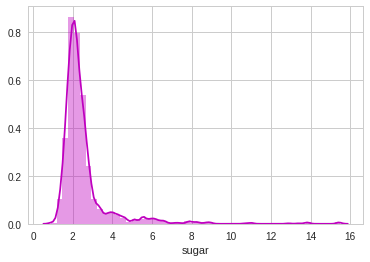

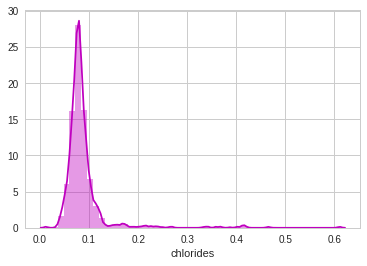

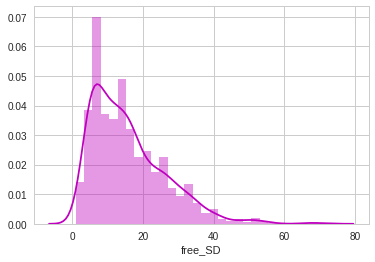

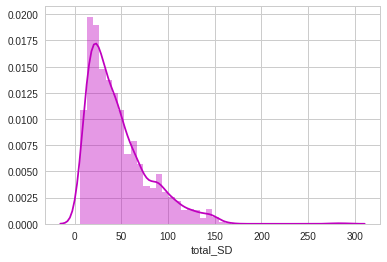

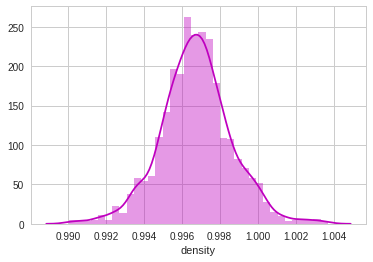

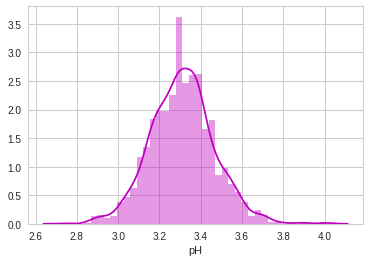

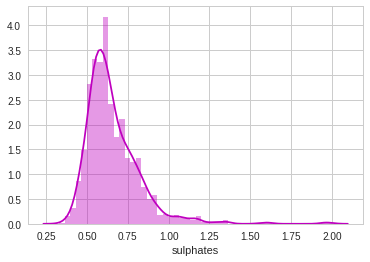

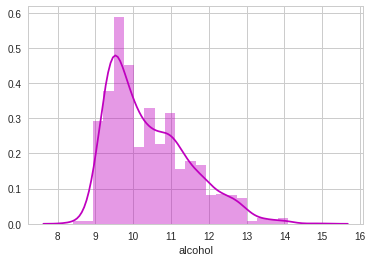

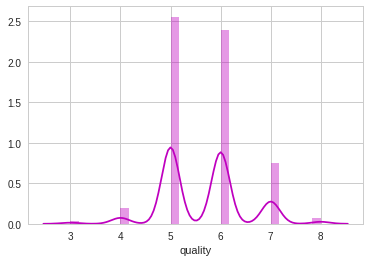

In [9]:
for name in red_original.columns:
    sns.distplot(red_original[name], color="m")
    plt.show()

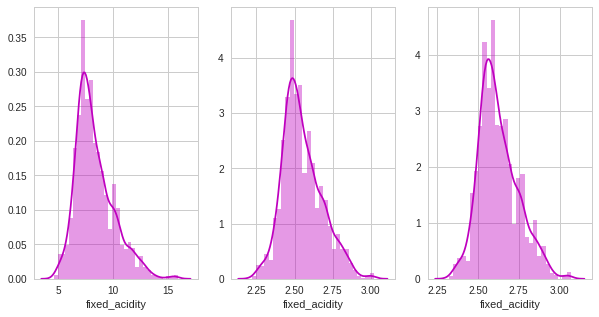

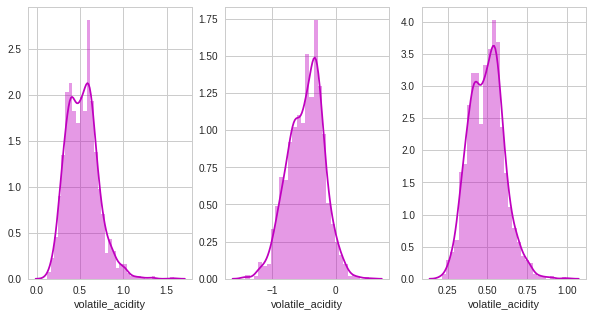

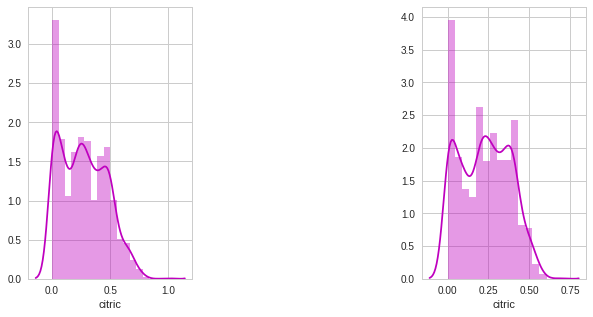

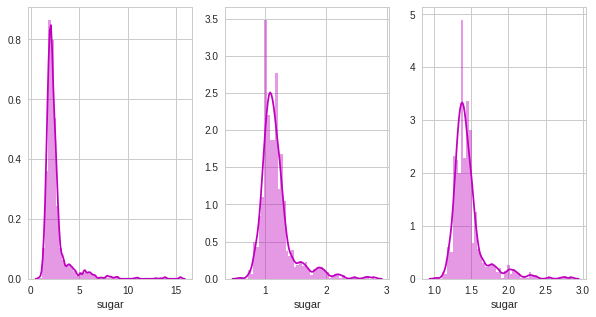

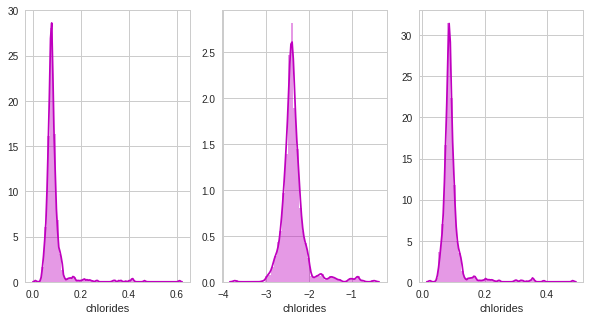

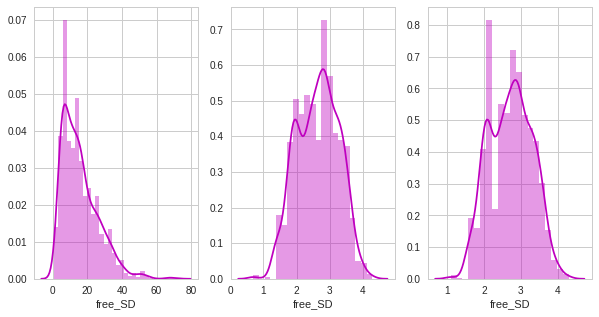

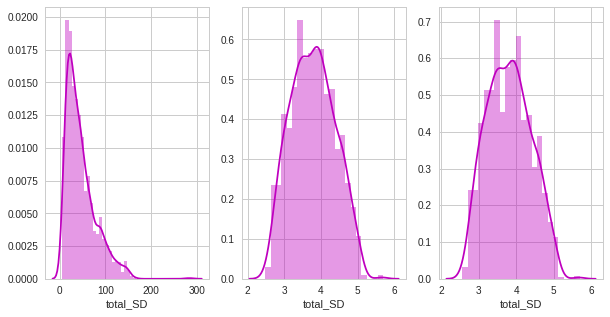

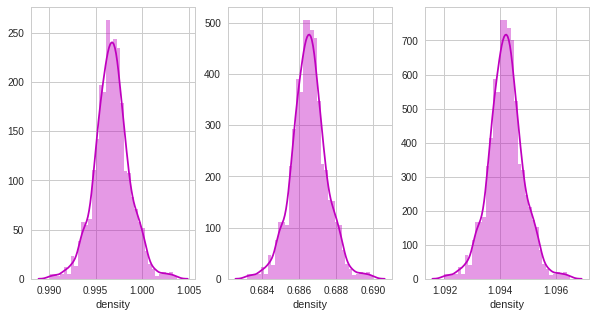

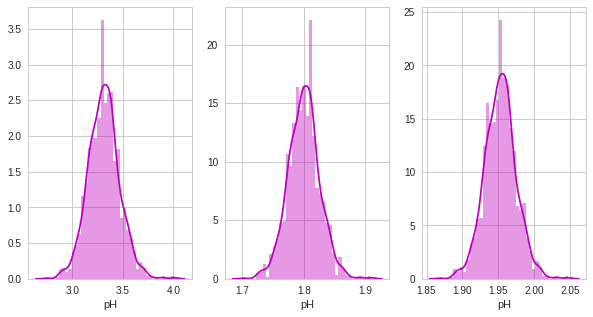

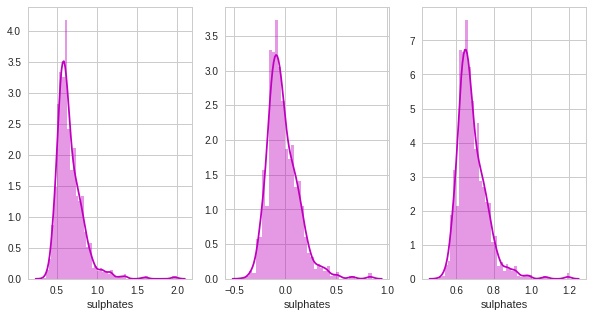

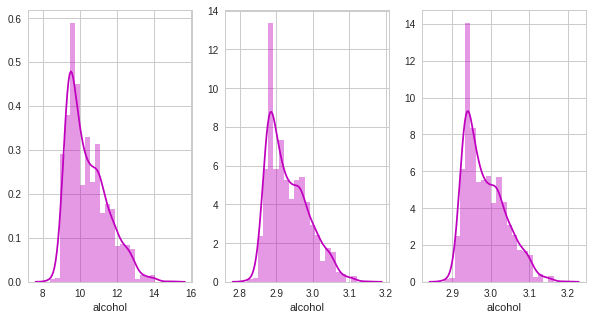

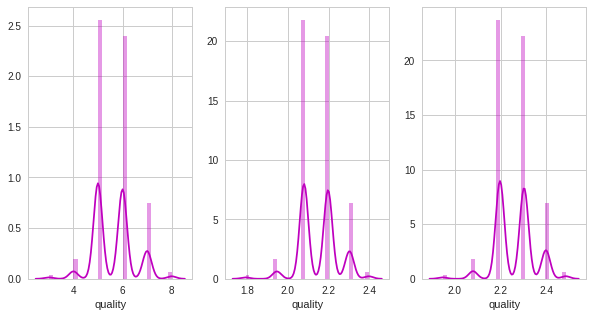

In [10]:
# It looks like some of the features would benefit from a log-type transformation
for name in red_original.columns:
    fig = plt.figure(3, figsize=(10, 5))
    fig.add_subplot(1, 3, 1)
    sns.distplot(red_original[name], color="m")
    if name != 'citric':
        fig.add_subplot(1, 3, 2)
        sns.distplot(red_original[name].apply(lambda x: np.log(x + min(red_original[name]))), color="m")
    fig.add_subplot(1, 3, 3)
    sns.distplot(red_original[name].apply(lambda x: np.log(x + 1 + min(red_original[name]))), color="m")
    plt.show()

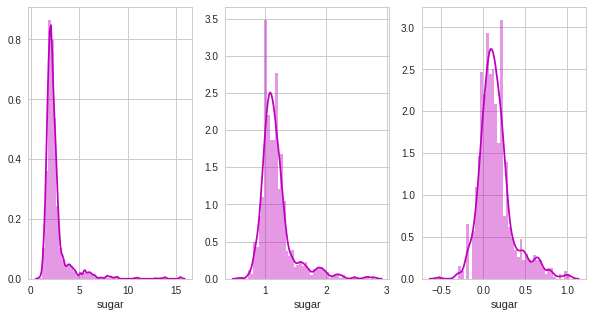

In [11]:
fig = plt.figure(2, figsize=(10, 5))
fig.add_subplot(1, 3, 1)
sns.distplot(red_original.sugar, color="m")
fig.add_subplot(1, 3, 2)
sns.distplot(red_original.sugar.apply(lambda x: np.log(x + min(red_original.sugar))), color="m")
fig.add_subplot(1, 3, 3)
sns.distplot(red_original.sugar.apply(lambda x: np.log(np.log(x + min(red_original.sugar)))), color="m")
plt.show()

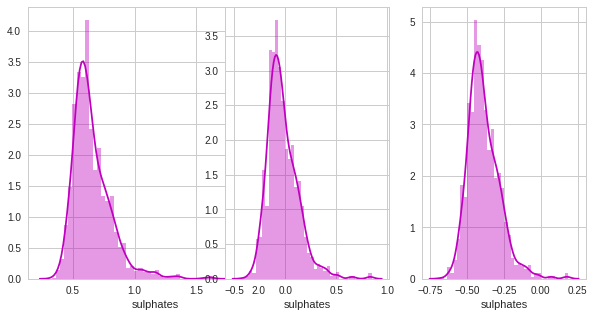

In [12]:
fig = plt.figure(2, figsize=(10, 5))
fig.add_subplot(1, 2, 1)
sns.distplot(red_original.sulphates, color="m")
fig.add_subplot(1, 3, 2)
sns.distplot(red_original.sulphates.apply(lambda x: np.log(x + min(red_original.sulphates))), color="m")
fig.add_subplot(1, 3, 3)
sns.distplot(red_original.sulphates.apply(lambda x: np.log(np.log(x + 1 + min(red_original.sulphates)))), color="m")
plt.show()

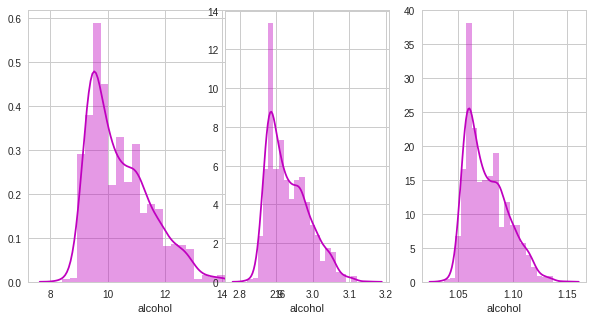

In [13]:
fig = plt.figure(2, figsize=(10, 5))
fig.add_subplot(1, 2, 1)
sns.distplot(red_original.alcohol, color="m")
fig.add_subplot(1, 3, 2)
sns.distplot(red_original.alcohol.apply(lambda x: np.log(x + min(red_original.alcohol))), color="m")
fig.add_subplot(1, 3, 3)
sns.distplot(red_original.alcohol.apply(lambda x: np.log(np.log(x + min(red_original.alcohol)))), color="m")
plt.show()

In [63]:
log_features = ['volatile_acidity', 'chlorides', 'free_SD', 'total_SD']
log_log_features = ['sugar']
log_log_one_features = ['sulphates']

In [64]:
red = red_original.copy(deep=True)

In [65]:
for name in log_features:
    red[name] = red_original[name].apply(lambda x: np.log(x + min(red_original[name])))

In [66]:
for name in log_log_features:
    red[name] = red_original[name].apply(lambda x: np.log(np.log(x + min(red_original[name]))))

In [67]:
for name in log_log_features:
    red[name] = red_original[name].apply(lambda x: np.log(np.log(x + 1 + min(red_original[name]))))

In [68]:
red.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
0,7.4,-0.198451,0.00,0.288932,-2.430418,2.484907,3.688879,0.9978,3.51,0.56,9.4,5
1,7.8,0.000000,0.00,0.408180,-2.207275,3.258097,4.290459,0.9968,3.20,0.68,9.8,5
2,7.8,-0.127833,0.04,0.361224,-2.263364,2.772589,4.094345,0.9970,3.26,0.65,9.8,5
3,11.2,-0.916291,0.56,0.288932,-2.441847,2.890372,4.189655,0.9980,3.16,0.58,9.8,6
4,7.4,-0.198451,0.00,0.288932,-2.430418,2.484907,3.688879,0.9978,3.51,0.56,9.4,5


In [69]:
# normalize the data
temp = red['quality']
red = red.ix[:,:-1]
red = (red - red.mean())/red.std()
red['quality'] = temp

In [104]:
#red.to_csv("data/red_normal.csv", index=False)

In [71]:
red.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
0,-0.528194,0.981974,-1.391037,-0.590653,-0.231744,-0.247049,-0.159545,0.558100,1.288240,-0.579025,-0.959946,5
1,-0.298454,1.693658,-1.391037,0.296646,0.535000,0.992454,0.854271,0.028252,-0.719708,0.128910,-0.584594,5
2,-0.298454,1.235222,-1.185699,-0.052744,0.342271,0.214135,0.523767,0.134222,-0.331073,-0.048074,-0.584594,5
3,1.654339,-1.592344,1.483689,-0.590653,-0.271015,0.402953,0.684389,0.664069,-0.978798,-0.461036,-0.584594,6
4,-0.528194,0.981974,-1.391037,-0.590653,-0.231744,-0.247049,-0.159545,0.558100,1.288240,-0.579025,-0.959946,5


In [72]:
red.describe()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,-1.570643e-14,1.903696e-15,6.045057e-15,6.890465e-16,-5.481127e-15,1.728830e-15,1.754918e-14,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-3.424267e+00,-1.391037e+00,-2.523350e+00,-4.696214e+00,-3.119426e+00,-2.188545e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.210902e-01,-9.290275e-01,-5.906527e-01,-4.743936e-01,-8.970519e-01,-7.606324e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,9.318336e-02,-5.634264e-02,-1.787493e-01,-1.165570e-01,1.106730e-01,1.077316e-03,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,7.094728e-01,7.650078e-01,2.966458e-01,2.755481e-01,7.246494e-01,7.346989e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,3.596598e+00,3.742403e+00,5.069232e+00,6.493430e+00,2.647439e+00,3.207755e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


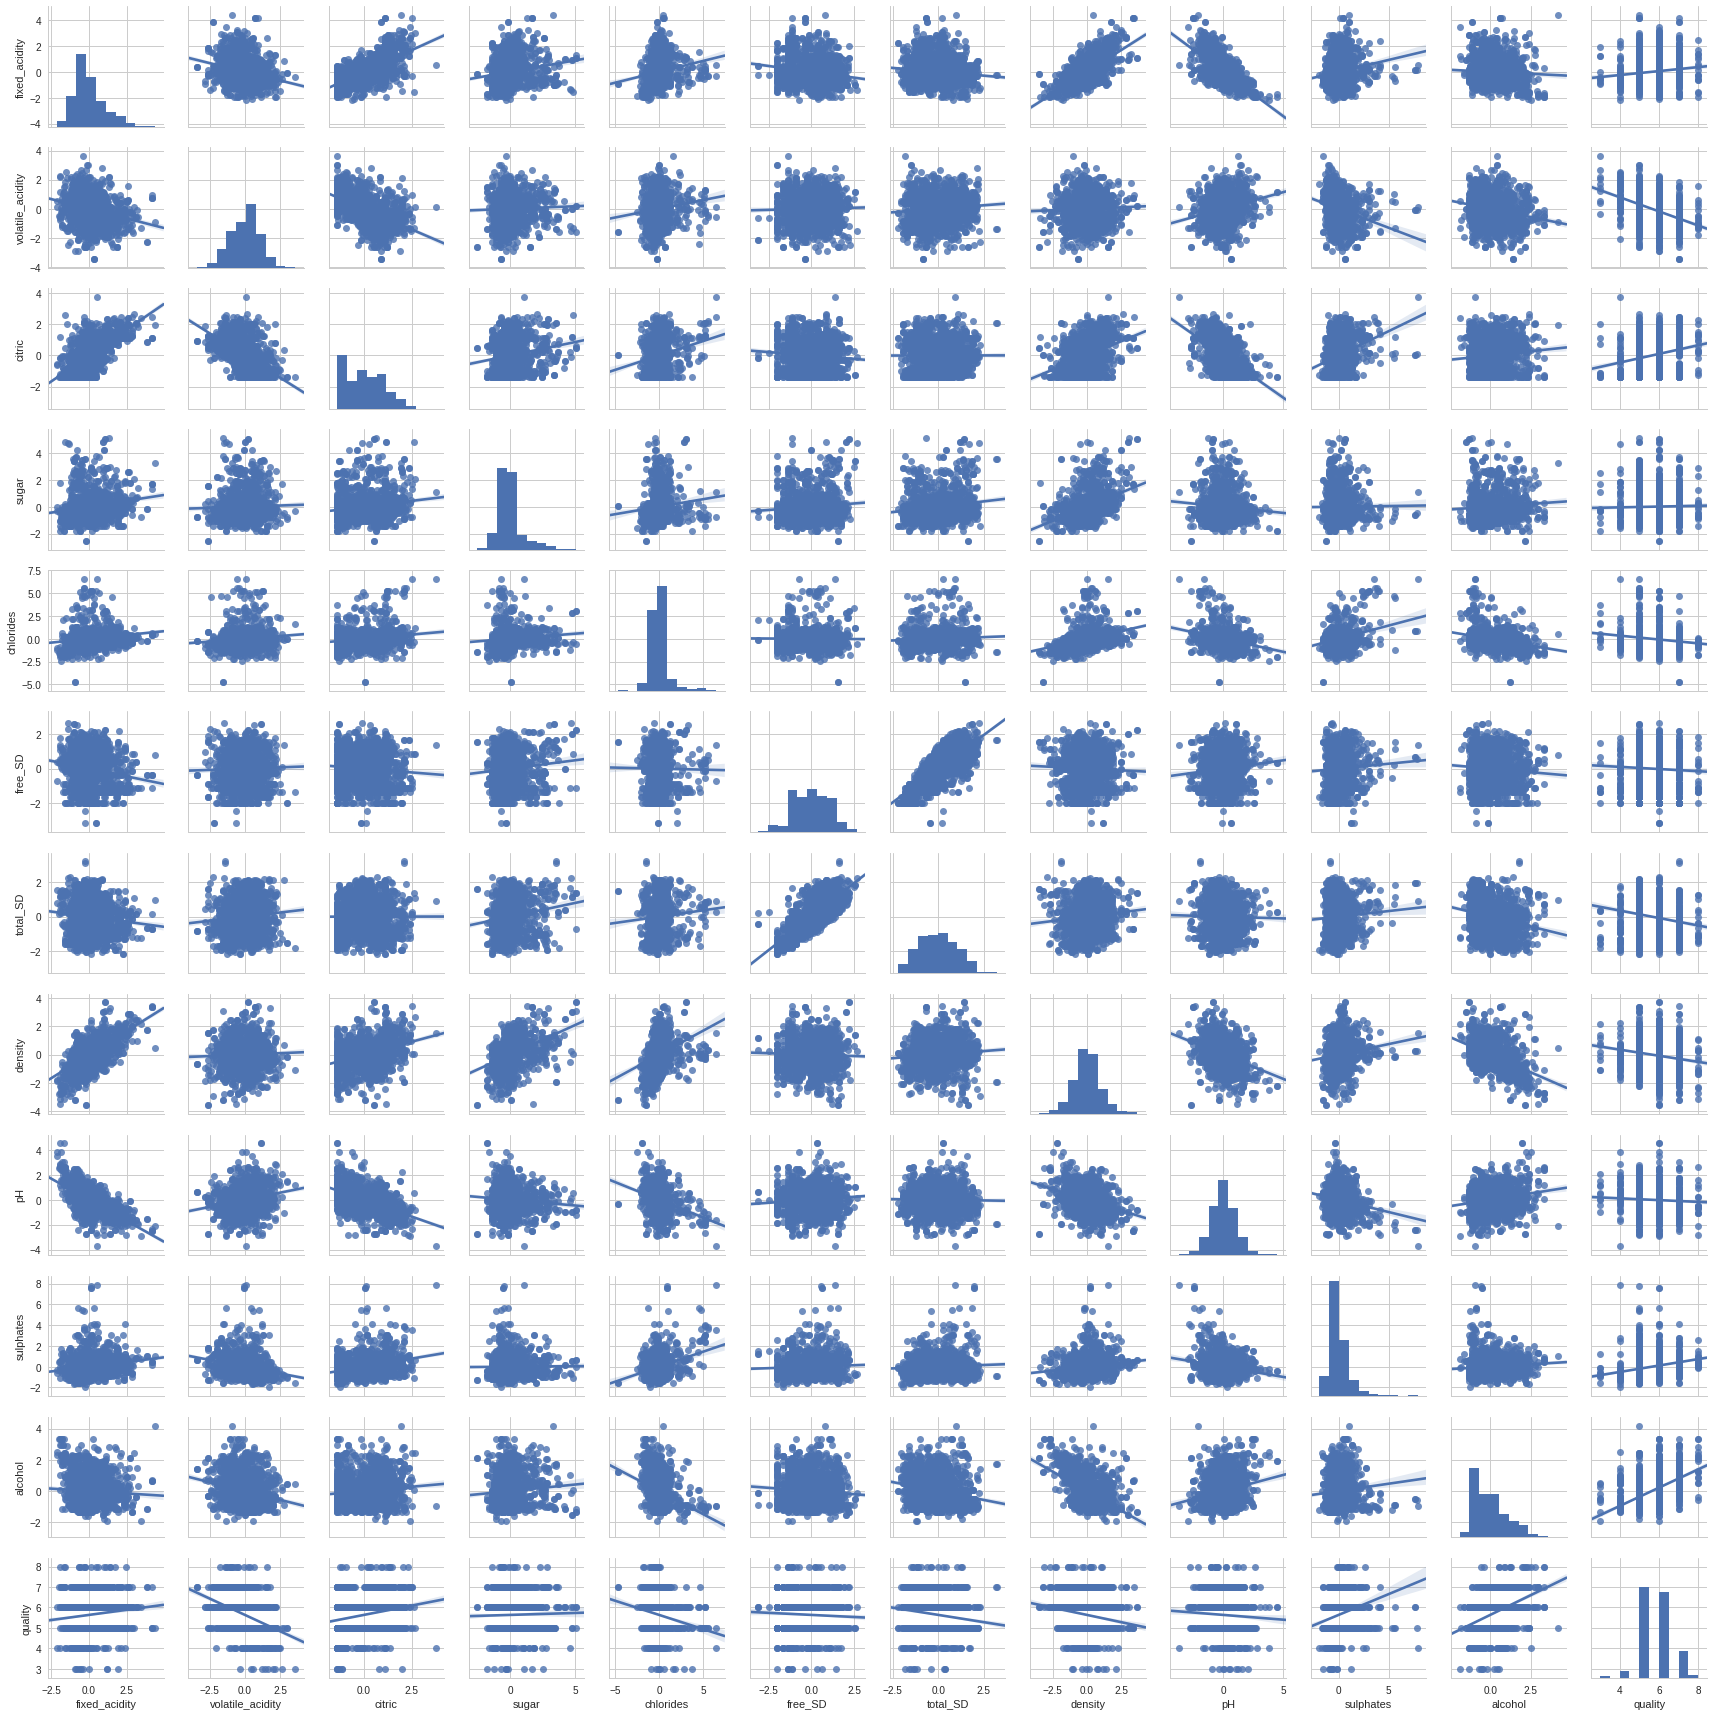

In [24]:
# We produce a scatter plot for each pair of variables
sns.pairplot(red, kind='reg', size = 2)
plt.show()

In [25]:
red.corr()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.266784,0.671703,0.176192,0.168093,-0.179551,-0.119273,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.266784,1.000000,-0.568321,0.035068,0.119764,0.029169,0.095809,0.040544,0.227796,-0.260195,-0.225355,-0.393284
citric,0.671703,-0.568321,1.000000,0.172903,0.185558,-0.087838,0.001674,0.364947,-0.541904,0.312770,0.109903,0.226373
sugar,0.176192,0.035068,0.172903,1.000000,0.111345,0.096148,0.159165,0.417019,-0.091867,0.010444,0.083118,0.023708
chlorides,0.168093,0.119764,0.185558,0.111345,1.000000,-0.011785,0.073441,0.337354,-0.284635,0.288980,-0.296725,-0.171668
free_SD,-0.179551,0.029169,-0.087838,0.096148,-0.011785,1.000000,0.777620,-0.039532,0.095520,0.056451,-0.081808,-0.050344
total_SD,-0.119273,0.095809,0.001674,0.159165,0.073441,0.777620,1.000000,0.100762,-0.020849,0.064979,-0.229246,-0.176040
density,0.668047,0.040544,0.364947,0.417019,0.337354,-0.039532,0.100762,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.227796,-0.541904,-0.091867,-0.284635,0.095520,-0.020849,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260195,0.312770,0.010444,0.288980,0.056451,0.064979,0.148506,-0.196648,1.000000,0.093595,0.251397


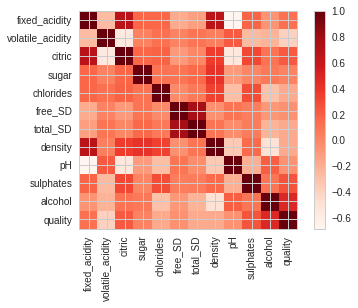

In [26]:
tick_marks = [i for i in range(len(red.columns))]
plt.imshow(red.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
plt.xticks(tick_marks, red.columns, rotation='vertical')
plt.yticks(tick_marks, red.columns)
plt.show()

From the pairplot and the correlation plot, we see that the variables that are the most correlated with quality are alcohol, volatile_acidity and sulphates.

In [27]:
correlations = pd.DataFrame(red.corr()['quality']).apply(np.abs)
correlations.sort_values(by='quality', ascending=False, )

,quality
quality,1.000000
alcohol,0.476166
volatile_acidity,0.393284
sulphates,0.251397
citric,0.226373
total_SD,0.176040
density,0.174919
chlorides,0.171668
fixed_acidity,0.124052
pH,0.057731


# 2. Exploration of White Wine

In [73]:
white_original = pd.read_csv("data/winequality-white.csv", delimiter=";").rename(columns=new_names)

In [ ]:
#white_original.to_csv("data/white_data.csv", index=False)

In [74]:
white_original.shape

(4898, 12)

In [75]:
white_original.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [76]:
white_original.isnull().any()

fixed_acidity       False
volatile_acidity    False
citric              False
sugar               False
chlorides           False
free_SD             False
total_SD            False
density             False
pH                  False
sulphates           False
alcohol             False
quality             False
dtype: bool

No missing values!

In [77]:
white_original.describe()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


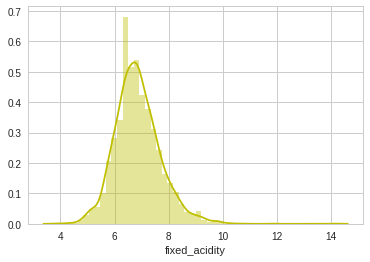

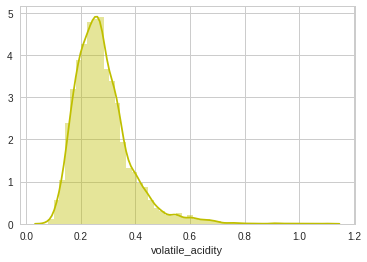

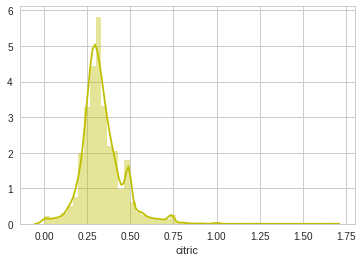

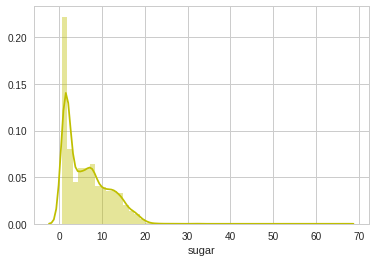

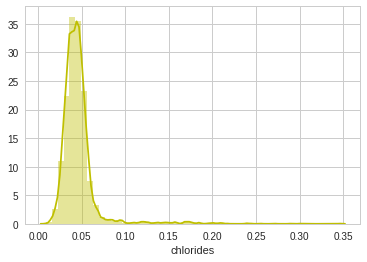

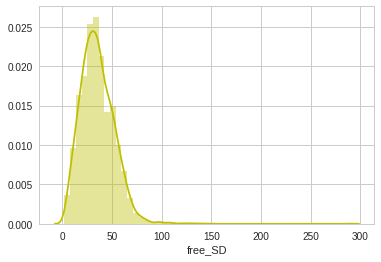

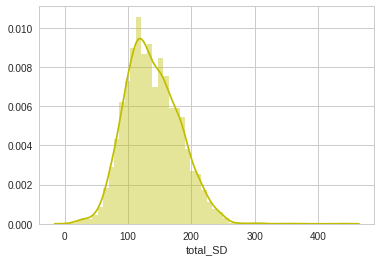

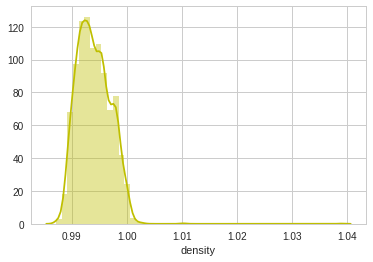

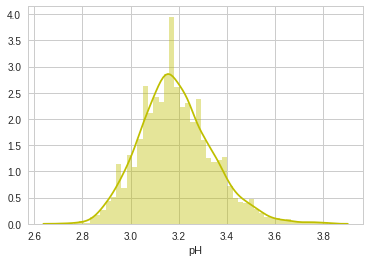

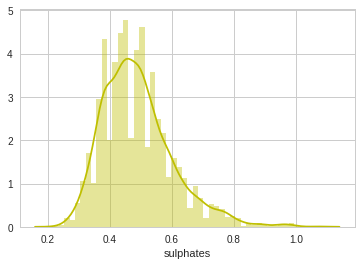

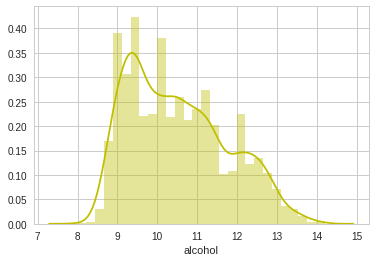

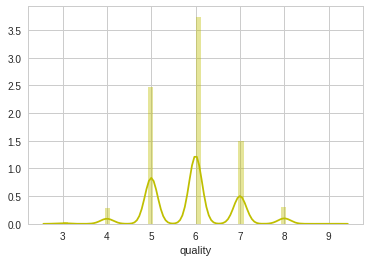

In [33]:
for name in white_original.columns:
    sns.distplot(white_original[name], color="y")
    plt.show()

Note that the citrics are remarkably different on white wines.

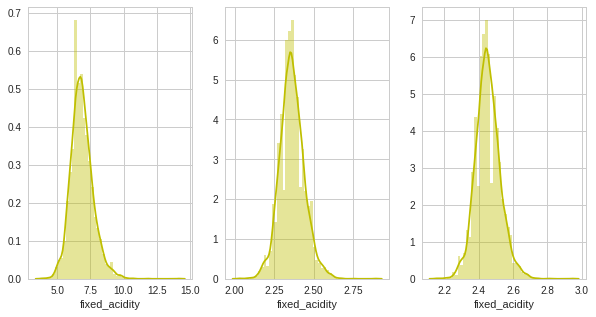

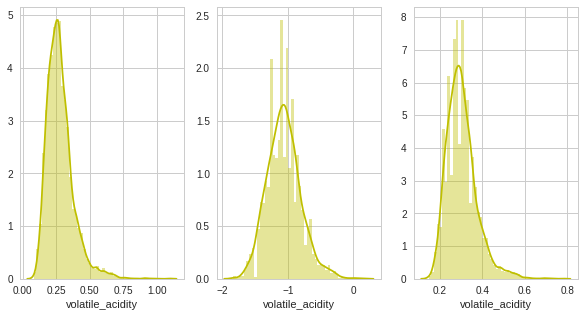

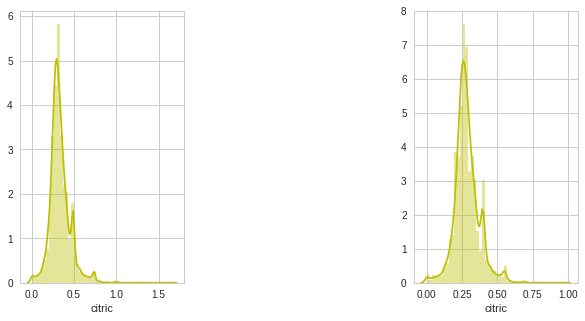

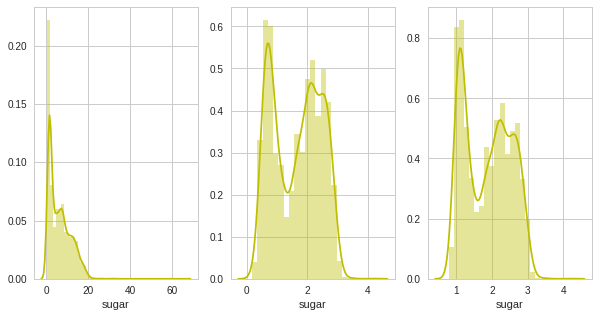

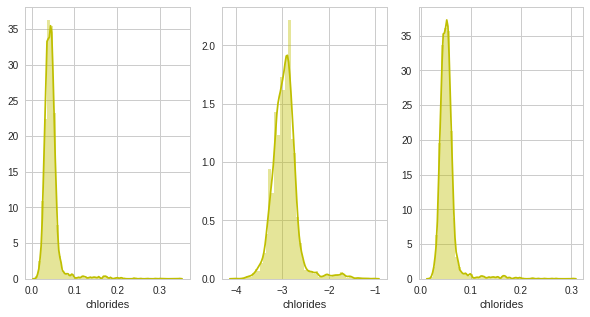

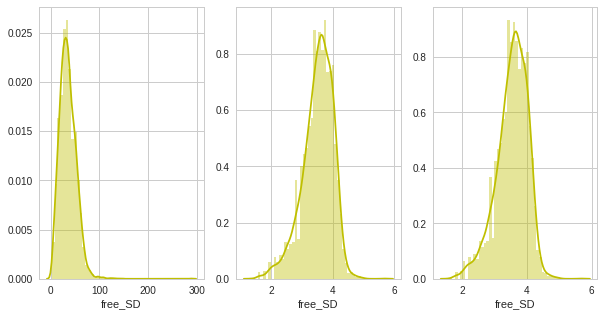

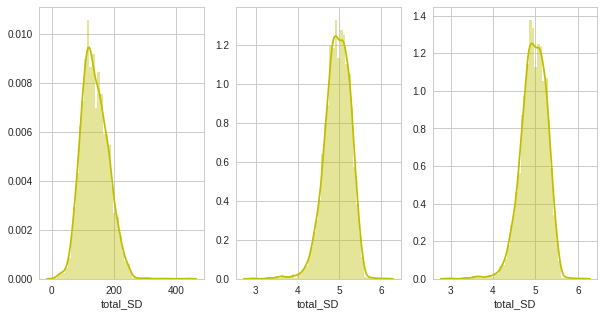

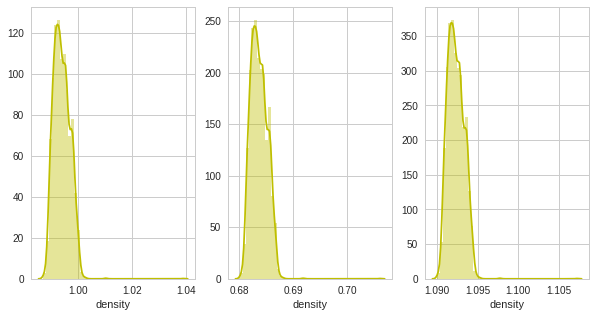

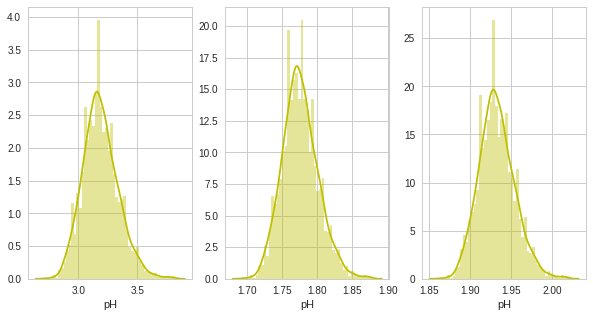

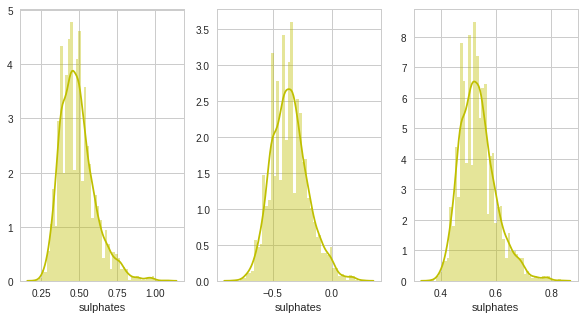

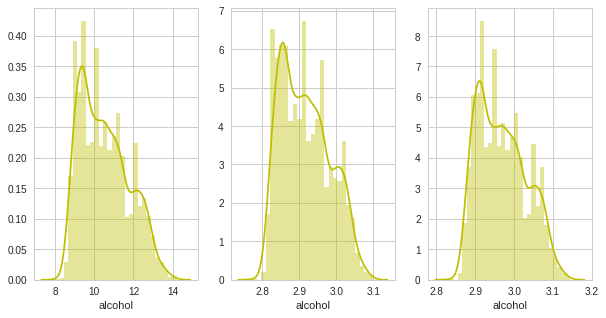

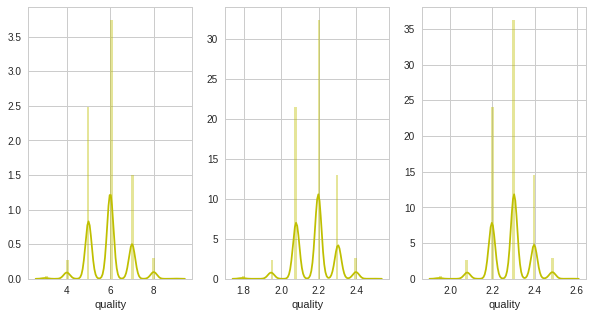

In [34]:
# It looks like some of the features would benefit from a log-type transformation
for name in red.columns:
    fig = plt.figure(3, figsize=(10, 5))
    fig.add_subplot(1, 3, 1)
    sns.distplot(white_original[name], color="y")
    if name != 'citric':
        fig.add_subplot(1, 3, 2)
        sns.distplot(white_original[name].apply(lambda x: np.log(x + min(white_original[name]))), color="y")
    fig.add_subplot(1, 3, 3)
    sns.distplot(white_original[name].apply(lambda x: np.log(x + 1 + min(white_original[name]))), color="y")
    plt.show()

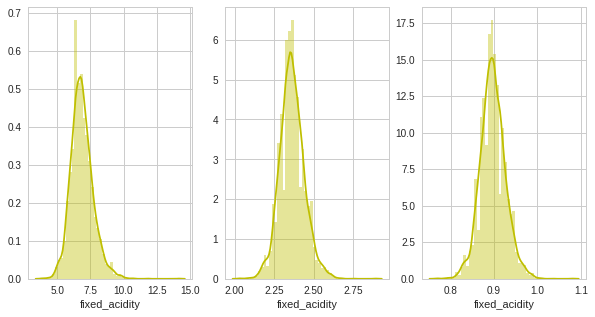

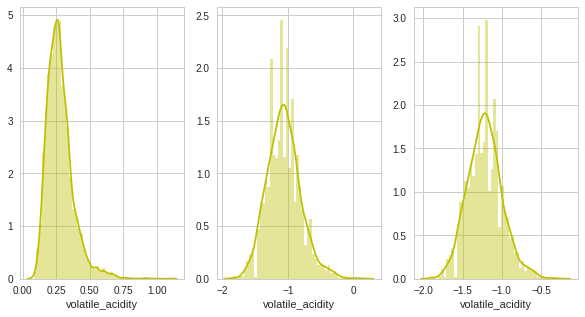

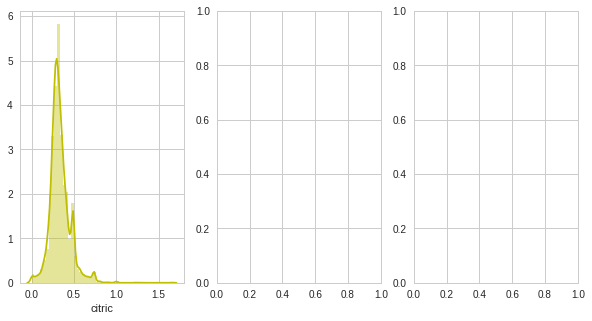

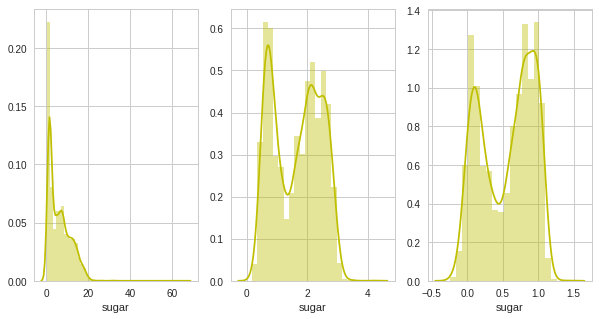

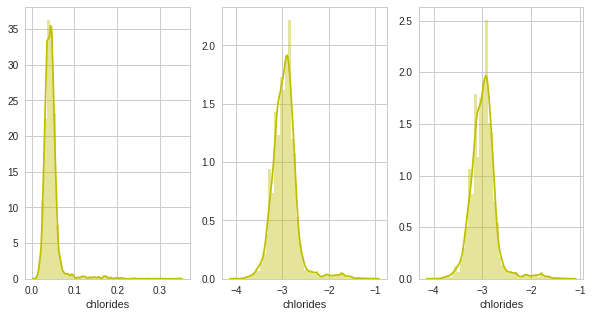

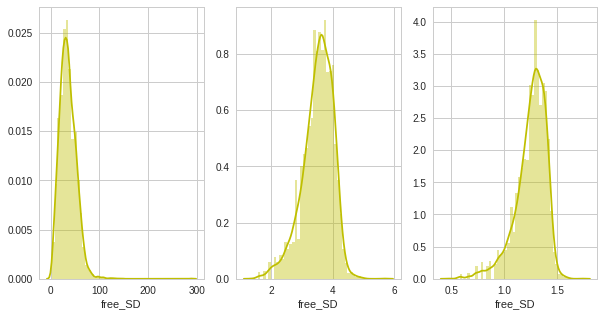

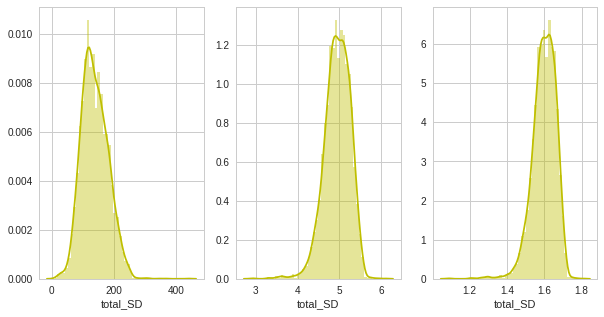

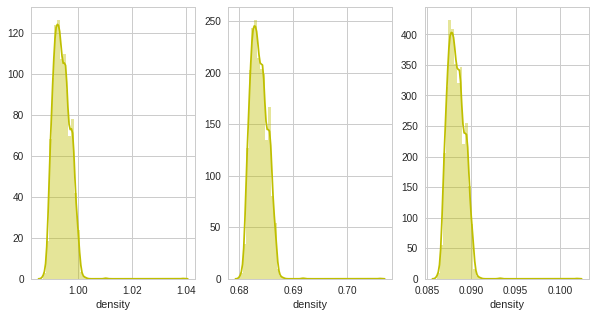

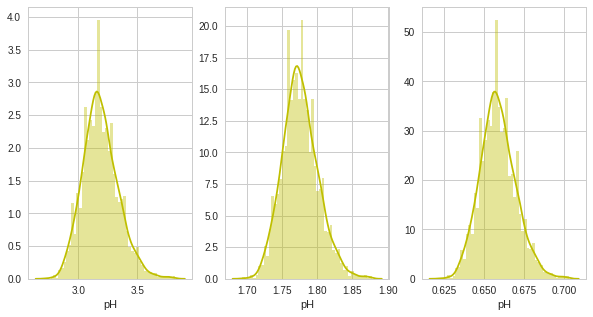

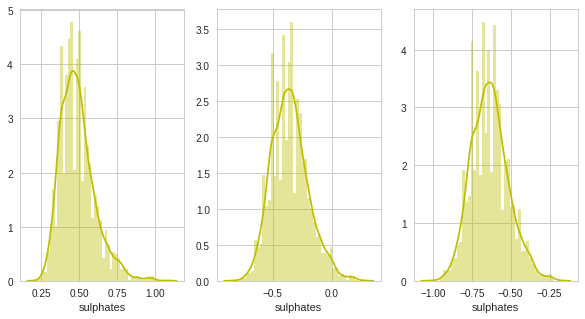

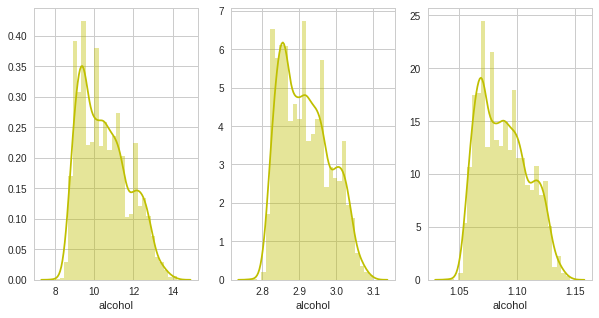

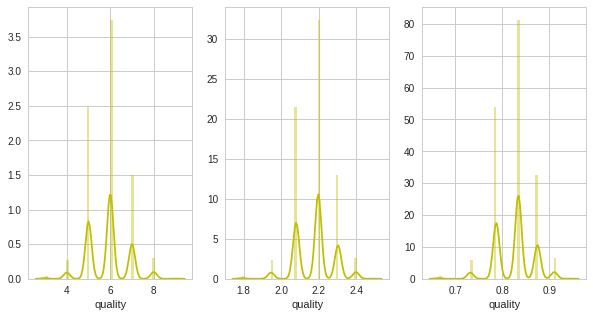

In [35]:
for name in white_original.columns:
    fig = plt.figure(2, figsize=(10, 5))
    try:
        fig.add_subplot(1, 3, 1)
        sns.distplot(white_original[name], color="y")
    except:
        pass
    try:
        fig.add_subplot(1, 3, 2)
        sns.distplot(white_original[name].apply(lambda x: np.log(x + min(white_original[name]))), color="y")
    except:
        pass
    try:
        fig.add_subplot(1, 3, 3)
        sns.distplot(white_original[name].apply(lambda x: np.log(np.log(x + 1 + min(white_original[name])))), color="y")
    except:
        pass
    plt.show()

In [78]:
log_features = ['fixed_acidity', 'volatile_acidity', 'chlorides', 'free_SD']

In [79]:
white = white_original.copy(deep=True)

In [80]:
for name in log_features:
    white[name] = white_original[name].apply(lambda x: np.log(x + min(white_original[name])))

In [81]:
white.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
0,2.379546,-1.049822,0.36,20.7,-2.918771,3.850148,170.0,1.0010,3.00,0.45,8.8,6
1,2.312535,-0.967584,0.34,1.6,-2.847312,2.772589,132.0,0.9940,3.30,0.49,9.5,6
2,2.476538,-1.021651,0.40,6.9,-2.830218,3.465736,97.0,0.9951,3.26,0.44,10.1,6
3,2.397895,-1.171183,0.32,8.5,-2.703063,3.891820,186.0,0.9956,3.19,0.40,9.9,6
4,2.397895,-1.171183,0.32,8.5,-2.703063,3.891820,186.0,0.9956,3.19,0.40,9.9,6


In [82]:
# normalize the data
temp = white['quality']
white = white.ix[:,:-1]
white = (white - white.mean())/white.std()
white['quality'] = temp

In [105]:
#white.to_csv("data/white_normal.csv", index=False)

In [85]:
white.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
0,0.212659,0.044742,0.213258,2.821061,0.116275,0.685891,0.744489,2.331274,-1.246794,-0.349149,-1.393010,6
1,-0.645329,0.362247,0.047996,-0.944669,0.372436,-1.472748,-0.149669,-0.009153,0.739953,0.001342,-0.824192,6
2,1.454524,0.153504,0.543783,0.100272,0.433714,-0.084188,-0.973236,0.358628,0.475053,-0.436771,-0.336633,6
3,0.447597,-0.423808,-0.117266,0.415726,0.889530,0.769373,1.120977,0.525802,0.011479,-0.787262,-0.499152,6
4,0.447597,-0.423808,-0.117266,0.415726,0.889530,0.769373,1.120977,0.525802,0.011479,-0.787262,-0.499152,6


In [86]:
white.describe()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4898.000000
mean,5.404574e-13,3.404085e-14,5.344610e-14,-2.538326e-15,-1.219611e-13,-9.790630e-14,-1.387439e-16,2.148461e-12,1.316599e-14,-1.280696e-14,-2.846868e-14,5.877909
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.885639
min,-4.286549e+00,-2.977334e+00,-2.761461e+00,-1.141827e+00,-3.821940e+00,-4.249867e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00,3.000000
25%,-6.453285e-01,-6.812896e-01,-5.304215e-01,-9.249530e-01,-5.372959e-01,-5.787153e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01,5.000000
50%,-2.666983e-02,-6.717287e-02,-1.172660e-01,-2.348977e-01,-1.901297e-02,1.517625e-01,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02,6.000000
75%,5.634689e-01,5.602800e-01,4.611517e-01,6.917479e-01,4.337144e-01,7.280668e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01,6.000000
max,6.753140e+00,4.736912e+00,1.095530e+01,1.171292e+01,6.866779e+00,4.338200e+00,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00,9.000000


In [ ]:
# We produce a scatter plot for each pair of variables
sns.pairplot(white, kind='reg', size = 2)
plt.show()

In [44]:
white.corr()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.030036,0.291753,0.097946,0.058692,-0.048956,0.098694,0.273108,-0.432138,-0.015343,-0.127517,-0.111078
volatile_acidity,-0.030036,1.000000,-0.137655,0.077788,0.039996,-0.100623,0.113497,0.026693,-0.048797,-0.041703,0.068481,-0.197164
citric,0.291753,-0.137655,1.000000,0.094212,0.104221,0.086943,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
sugar,0.097946,0.077788,0.094212,1.000000,0.164460,0.306979,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.058692,0.039996,0.104221,0.164460,1.000000,0.133028,0.289230,0.381448,-0.073763,0.040959,-0.488377,-0.268398
free_SD,-0.048956,-0.100623,0.086943,0.306979,0.133028,1.000000,0.602140,0.287279,0.019121,0.059875,-0.228674,0.091311
total_SD,0.098694,0.113497,0.121131,0.401439,0.289230,0.602140,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.273108,0.026693,0.149503,0.838966,0.381448,0.287279,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.432138,-0.048797,-0.163748,-0.194133,-0.073763,0.019121,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.015343,-0.041703,0.062331,-0.026664,0.040959,0.059875,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


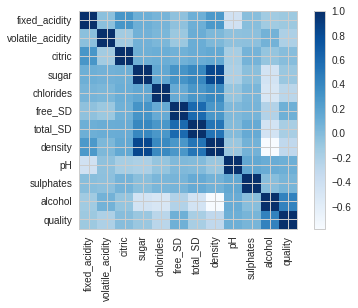

In [45]:
tick_marks = [i for i in range(len(white.columns))]
plt.imshow(white.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xticks(tick_marks, white.columns, rotation='vertical')
plt.yticks(tick_marks, white.columns)
plt.show()

In [46]:
correlations = pd.DataFrame(white.corr()['quality']).apply(np.abs)
correlations.sort_values(by='quality', ascending=False)

,quality
quality,1.000000
alcohol,0.435575
density,0.307123
chlorides,0.268398
volatile_acidity,0.197164
total_SD,0.174737
fixed_acidity,0.111078
pH,0.099427
sugar,0.097577
free_SD,0.091311


For white wines the correlation ranking changes.
 - Red: alcohol > volatile_acidity > sulphate > citric
 - White: alcohol > density > chlorides > 'volatile_acidity'

We also note that the correlations are weaker in the white wines, thankfully we have more white wine observations.

# 3. Joint Exploration of Red/White

In [92]:
red_original['type'] = 'red'
white_original['type'] = 'white'
wine_original = pd.concat([red_original, white_original]).sample(frac=1).reset_index(drop=True)
red_original.drop('type', axis=1, inplace=True)
white_original.drop('type', axis=1, inplace=True)

In [93]:
temp = wine_original['quality']
wine_original.drop('quality', axis=1, inplace=True)
wine_original['quality'] = temp

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,type,quality
0,6.3,0.270,0.25,5.8,0.038,52.0,155.0,0.99500,3.28,0.38,9.4,white,6
1,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,white,6
2,7.6,0.380,0.20,3.4,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,white,5
3,8.5,0.280,0.35,1.7,0.061,6.0,15.0,0.99524,3.30,0.74,11.8,red,7
4,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0,red,6


In [ ]:
#wine_original.to_csv("data/wine_data.csv", index=False)

In [106]:
wine_original.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,type,quality
0,6.3,0.270,0.25,5.8,0.038,52.0,155.0,0.99500,3.28,0.38,9.4,white,6
1,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,white,6
2,7.6,0.380,0.20,3.4,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,white,5
3,8.5,0.280,0.35,1.7,0.061,6.0,15.0,0.99524,3.30,0.74,11.8,red,7
4,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0,red,6


In [95]:
wine_original.describe()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


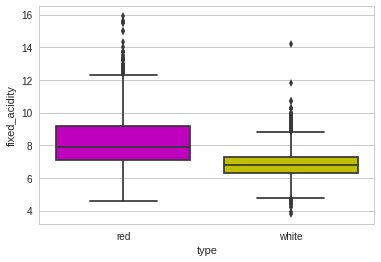

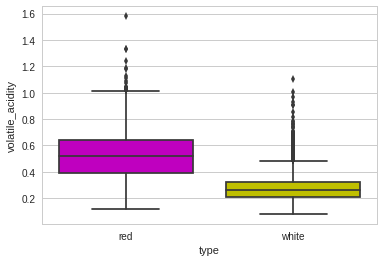

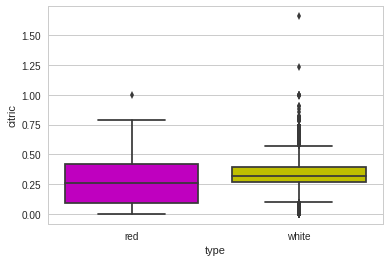

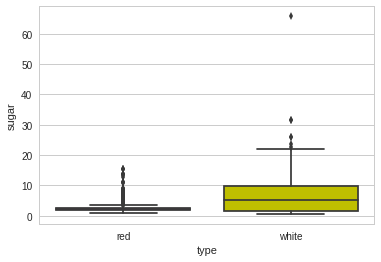

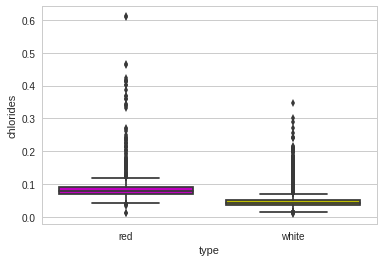

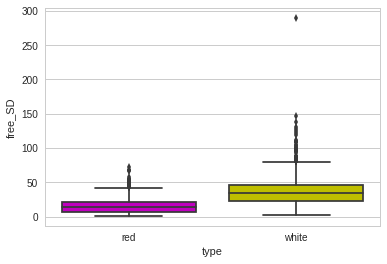

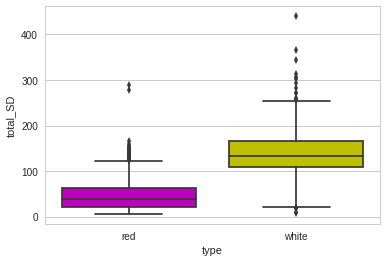

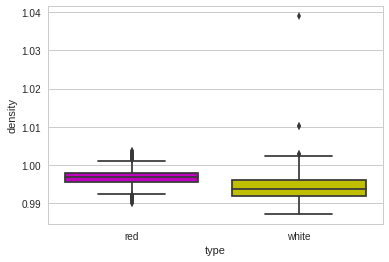

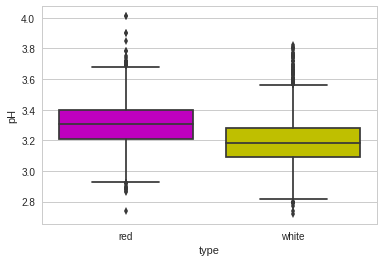

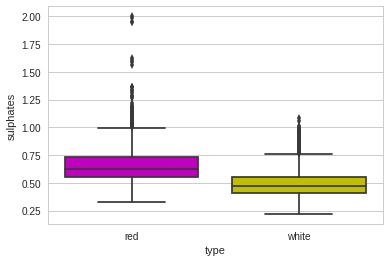

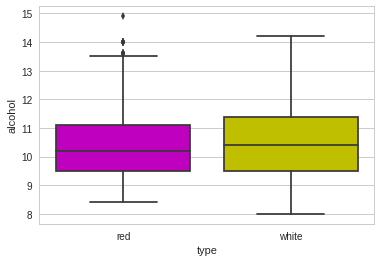

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [51]:
for name in wine_original.columns[:-1]:
    ax = sns.boxplot(x="type", y=name, color='m', data=wine_original)
    red_box = ax.artists[0]
    white_box = ax.artists[1]
    red_box.set_facecolor('m')
    white_box.set_facecolor('y')
    plt.show()

In [ ]:
for name in wine_original.columns[:-2]:
    fig = plt.figure(2, figsize=(10,5))
    fig.add_subplot(121)
    sns.distplot(red_original[name], color="m", label='red')
    sns.distplot(white_original[name], color="y", label='white')
    plt.legend()
    fig.add_subplot(122)
    sns.distplot(wine_original[name])
    plt.show()
fig = plt.figure(2, figsize=(10,5))
fig.add_subplot(121)
sns.distplot(red_original["quality"], kde=False, norm_hist=True, color="m", label='red')
sns.distplot(white_original["quality"], kde=False, norm_hist=True, color="y", label='white')
plt.legend()
fig.add_subplot(122)
sns.distplot(wine_original["quality"], kde=False, norm_hist=True)
plt.show()

First we note that there are significant differences between red and white wines. Also note that the blue graphics are misleading because the observations are 3:1 in favor of white wines. For this same reason, a joint normalization would be skewed towards white wines so it makes sense to treat them independently.

In [99]:
# normalized data
red['type'] = 'red'
white['type'] = 'white'

wine = pd.concat([red, white]).sample(frac=1).reset_index(drop=True)

red.drop('type', axis=1, inplace=True)
white.drop('type', axis=1, inplace=True)

temp = wine['quality']
wine.drop('quality', axis=1, inplace=True)
wine['quality'] = temp

In [101]:
#wine.to_csv("data/wine_normal.csv", index=False)

In [102]:
wine.head()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,type,quality
0,-1.564967,-2.115822,-0.613053,-0.412341,-0.381414,-1.025732,-0.973236,0.248294,1.137303,-0.261526,-1.067971,white,5
1,-0.987675,1.452634,-1.288368,0.404591,-0.391592,0.402953,-0.159545,-0.660550,1.741648,1.367797,1.761353,red,7
2,-0.772730,1.646757,-0.613053,-0.392625,1.147534,1.335430,1.591586,-0.009153,0.541278,0.264209,-0.580412,white,4
3,-0.645329,-0.550403,-0.282528,-0.865805,0.433714,-0.578715,-0.432035,-0.664473,0.342604,-0.173903,-0.092853,white,6
4,-0.298454,-0.583142,2.099702,-0.898276,5.590264,0.489629,0.899821,0.293176,-1.496978,3.845571,-1.053784,red,5


In [98]:
wine.describe()

,fixed_acidity,volatile_acidity,citric,sugar,chlorides,free_SD,total_SD,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000
mean,4.028874e-13,2.628014e-14,4.250315e-14,-1.768454e-15,-9.332799e-14,-7.336378e-14,4.187508e-15,1.712333e-12,8.770882e-15,-1.023182e-14,-1.588964e-14,5.818378
std,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,9.999230e-01,0.873255
min,-4.286549e+00,-3.424267e+00,-2.761461e+00,-2.523350e+00,-4.696214e+00,-4.249867e+00,-3.043919e+00,-3.537625e+00,-3.699244e+00,-2.364468e+00,-2.043089e+00,3.000000
25%,-6.453285e-01,-6.812896e-01,-6.130526e-01,-8.855212e-01,-5.372959e-01,-5.787153e-01,-7.144009e-01,-7.380291e-01,-6.549356e-01,-6.970146e-01,-8.661079e-01,5.000000
50%,-6.871376e-02,-2.067383e-02,-1.172660e-01,-1.954660e-01,-7.900358e-02,1.106730e-01,-7.907789e-02,-7.602259e-02,-5.474574e-02,-1.739035e-01,-1.741130e-01,6.000000
75%,5.634689e-01,6.556132e-01,5.437828e-01,5.340210e-01,4.337144e-01,7.280668e-01,6.974281e-01,6.595403e-01,6.075033e-01,4.828778e-01,7.197450e-01,6.000000
max,6.753140e+00,4.736912e+00,1.095530e+01,1.171292e+01,6.866779e+00,4.338200e+00,7.097720e+00,1.502976e+01,4.526866e+00,7.916200e+00,4.201138e+00,9.000000


In [ ]:
sns.pairplot(wine, hue="type", kind='reg', size = 1.5)
plt.show()

We observe that no matter whether the wine is red or white, the trends of the features with respect to quality are quite similar. This means that we might be able to use the whole data set to train a model to make predictions about both red and white wines. In other words, the differences seem small enough that giving the model the 'type' feature could be enough to pick up on the information.

In [ ]:
tick_marks = [i for i in range(len(wine.columns))]
plt.imshow(wine.corr(), cmap=plt.cm.Greens, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(wine.columns))]
plt.xticks(tick_marks, wine.columns, rotation='vertical')
plt.yticks(tick_marks, wine.columns)
plt.show()

In [ ]:
correlations = pd.DataFrame(wine.corr()['quality']).apply(np.abs)
correlations.sort_values(by='quality', ascending=False)

In [ ]:
index = red_corr.index

In [ ]:
red_corr = pd.DataFrame(red.corr()['quality'], index=index).rename(columns={'quality': 'red'})
white_corr = pd.DataFrame(white.corr()['quality'], index=index).rename(columns={'quality': 'white'})
wine_corr = pd.DataFrame(wine.corr()['quality'], index=index).rename(columns={'quality': 'wine'})

In [ ]:
correlations = pd.concat([red_corr, white_corr, wine_corr], axis=1)

In [ ]:
correlations

In [ ]:
from pandas.tools.plotting import andrews_curves, parallel_coordinates

In [ ]:
tick_marks = [i for i in range(len(wine.columns)-2)]

In [ ]:
red_avg = wine[wine.type == 'red'].drop('quality', axis=1).mean()
red_avg['type'] = 'red'
white_avg = wine[wine.type == 'white'].drop('quality', axis=1).mean()
white_avg['type'] = 'white'

In [ ]:
wine_avg = pd.DataFrame([red_avg, white_avg])

In [ ]:
plt.figure()
parallel_coordinates(wine_avg, 'type')
plt.xticks(tick_marks, wine.columns, rotation='vertical')
plt.show()

In [ ]:
plt.figure()
andrews_curves(wine_avg, 'type')
plt.show()

In [ ]:
plt.figure()
parallel_coordinates(wine, 'type')
plt.xticks(tick_marks, wine.columns, rotation='vertical')
plt.show()

In [ ]:
plt.figure()
andrews_curves(wine, 'type')
plt.show()